In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # 假设使用线性回归作为预测模型
%load_ext autoreload
%autoreload 2
from script.temp.tools.data_utils import data_utils
data = data_utils('config.xlsx','result.xlsx')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
data.preprocess()
print(len(data.df_result))
data.df_result = data.drop(['IOPS_Read', 'IOPS_Write', 'Bandwidth_Read', 'Bandwidth_Write'],0)
print(len(data.df_result))
data.targetLst = ['IOPS_Read']
X,y = data.dorp_and_encode()

1326
1326


In [56]:
print(len(data.df_result_droped.columns))
print(len(X.columns))
X

65
103


,PCIe_Lane_Bandwidth,PCIe_Lane_Count,SATA_Processing_Delay,IO_Queue_Depth,Queue_Fetch_Size,Data_Cache_Capacity,Data_Cache_DRAM_Row_Size,Data_Cache_DRAM_Data_Rate,Data_Cache_DRAM_Data_Busrt_Size,Data_Cache_DRAM_tRCD,...,Flash_Technology_SLC,Flash_Technology_TLC,CMD_Suspension_Support_ERASE,CMD_Suspension_Support_NONE,CMD_Suspension_Support_PROGRAM,CMD_Suspension_Support_PROGRAM_ERASE,Address_Distribution_RANDOM_UNIFORM,Address_Distribution_STREAMING,Request_Size_Distribution_FIXED,Request_Size_Distribution_NORMAL
0,2.239937,19,1479246,40992,768,758850560,13312,42,4,38,...,False,True,False,True,False,False,True,False,True,False
1,3.833080,20,1633859,280249,2048,113936640,24320,185,4,40,...,False,False,False,False,True,False,False,True,True,False
2,0.813286,10,1695703,273446,1536,607634944,15872,390,3,48,...,True,False,False,True,False,False,False,True,False,True
3,4.543161,8,86586,273295,1024,86119168,7424,264,2,20,...,False,True,False,False,True,False,False,True,True,False
4,4.709682,6,1173237,145796,1280,132569344,28160,409,2,34,...,False,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1.239327,4,744037,57949,1280,645645056,15360,444,3,64,...,False,False,False,False,True,False,False,True,True,False
1332,0.747370,14,1909183,150541,1024,351342592,18432,20,5,13,...,False,False,False,True,False,False,True,False,True,False
1333,0.227565,20,827093,145559,512,410380288,18688,236,1,54,...,False,False,False,False,True,False,False,True,True,False
1334,1.856683,20,859326,310596,768,296594688,29952,87,3,25,...,True,False,False,False,True,False,True,False,True,False


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 假设 X 和 y 都是 DataFrame

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林回归模型
model = RandomForestRegressor()

# 训练模型
model.fit(X_train, y_train.values.ravel())

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 将y_test和y_pred转换为一维数组
y_test_array = y_test.values.ravel()
y_pred_array = y_pred.flatten()

# 计算百分比误差
percentage_errors = np.abs((y_test_array - y_pred_array) / y_test_array) * 100

# 创建 DataFrame
df_result = pd.DataFrame({'预测值': y_pred_array, '实际值': y_test_array, '百分比误差': percentage_errors})


df_result

,预测值,实际值,百分比误差
0,1805.984,1242.3,45.374225
1,379.045,331.9,14.204580
2,2946.397,2828.9,4.153452
3,819.508,810.9,1.061537
4,49563.098,72439.8,31.580294
...,...,...,...
261,275.157,213.3,29.000000
262,5551.674,5126.5,8.293651
263,1457.955,974.6,49.595219
264,41620.653,42097.7,1.133190


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

# 自定义评估函数：平均百分比误差
def mean_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 初始化决策树回归模型
model = DecisionTreeRegressor()

# 定义参数网格
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用自定义评估函数
scoring = make_scorer(mean_percentage_error, greater_is_better=False)

# 初始化网格搜索
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)

# 进行网格搜索
grid_search.fit(X_train, y_train.values.ravel())

# 输出最佳参数和最佳评分
print("最佳参数:", grid_search.best_params_)
print("最佳评分:", -grid_search.best_score_)  # 注意：网格搜索结果的评分是负值，因为我们希望最小化平均百分比误差


/home/ezra/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ezra/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/ezra/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/ezra/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/tmp/ipykernel_14333/202831288.py", line 8, in mean_percentage_error
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  File "/home/ezra/anaconda3/lib/python3.9/site-packages/pan

最佳参数: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
最佳评分: nan


/home/ezra/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ezra/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/ezra/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/ezra/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/tmp/ipykernel_14333/202831288.py", line 8, in mean_percentage_error
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  File "/home/ezra/anaconda3/lib/python3.9/site-packages/pan

In [45]:
mean_percentage_error = np.mean(percentage_errors)

print("平均百分比误差：", mean_percentage_error)

平均百分比误差： 34.16876211553693


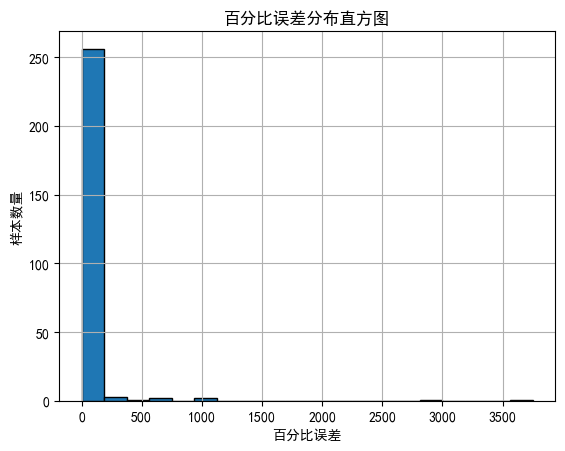

In [12]:
import matplotlib.pyplot as plt

# 假设 percentage_errors 是一个包含每个样本百分比误差的一维数组

# 绘制直方图
plt.hist(percentage_errors, bins=20, edgecolor='black')
plt.xlabel('百分比误差')
plt.ylabel('样本数量')
plt.title('百分比误差分布直方图')
plt.grid(True)
plt.show()


In [25]:
# 创建 DataFrame
df = pd.concat([X_test.reset_index(drop=True), 
                pd.DataFrame({'y_pred': y_pred_array, 
                              'y_test': y_test_array, 
                              'percentage_errors': percentage_errors})], 
               axis=1)
df

,PCIe_Lane_Bandwidth,PCIe_Lane_Count,SATA_Processing_Delay,IO_Queue_Depth,Queue_Fetch_Size,Data_Cache_Capacity,Data_Cache_DRAM_Row_Size,Data_Cache_DRAM_Data_Rate,Data_Cache_DRAM_Data_Busrt_Size,Data_Cache_DRAM_tRCD,...,CMD_Suspension_Support_NONE,CMD_Suspension_Support_PROGRAM,CMD_Suspension_Support_PROGRAM_ERASE,Address_Distribution_RANDOM_UNIFORM,Address_Distribution_STREAMING,Request_Size_Distribution_FIXED,Request_Size_Distribution_NORMAL,y_pred,y_test,percentage_errors
0,3.015421,10,766145,185516,256,323793152,11520,273,3,40,...,False,False,False,True,False,False,True,1791.384000,1242.3,44.198986
1,3.899290,19,1958567,48012,1024,967566848,16384,182,5,10,...,False,False,False,True,False,False,True,367.186000,331.9,10.631516
2,1.053410,4,753968,181435,1792,729218816,25600,238,1,35,...,True,False,False,True,False,False,True,2785.049000,2828.9,1.550108
3,3.495692,3,1206413,102351,2048,400726528,5888,193,2,38,...,True,False,False,True,False,False,True,786.982000,810.9,2.949562
4,3.788627,18,519862,118941,1280,161022464,15872,336,5,40,...,False,False,False,True,False,True,False,57524.950000,72439.8,20.589303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,3.276579,1,1562162,129311,2048,343339008,8960,48,3,32,...,True,False,False,False,True,False,True,272.788545,213.3,27.889613
262,3.604175,17,842075,60210,1536,418552576,20992,218,2,54,...,False,True,False,True,False,False,True,5660.612000,5126.5,10.418648
263,3.361245,1,130154,187727,2048,972922880,28928,210,4,35,...,False,True,False,True,False,True,False,3369.888000,974.6,245.771393
264,2.610939,11,931697,202083,1536,1036444160,30208,475,4,19,...,False,True,False,False,True,True,False,41069.961000,42097.7,2.441319


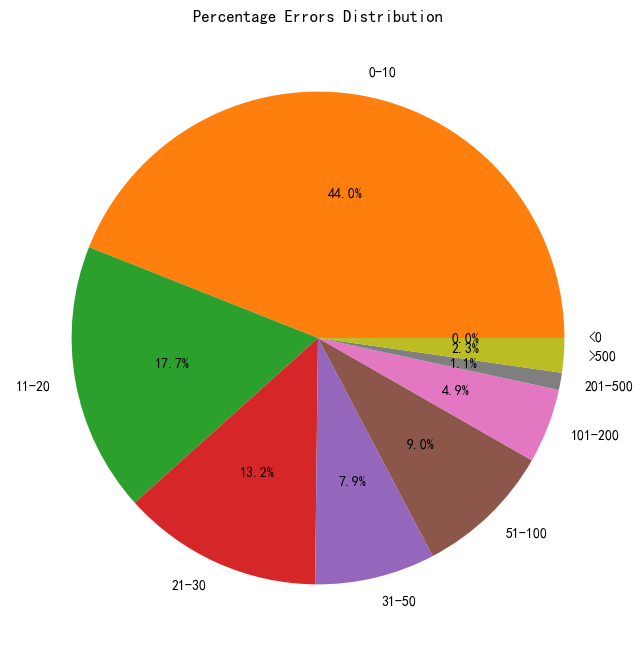

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 percentage_errors 是你的百分比误差数据

# 定义区间
bins = [-np.inf, 0, 10, 20, 30, 50, 100, 200, 500, np.inf]
labels = ['<0', '0-10', '11-20', '21-30', '31-50', '51-100', '101-200', '201-500', '>500']

# 将百分比误差分组到不同的区间
binned_errors = pd.cut(percentage_errors, bins=bins, labels=labels)

# 统计每个区间内的频数
error_counts = binned_errors.value_counts()

# 绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%')
plt.title('Percentage Errors Distribution')
plt.show()


In [2]:
import matplotlib
print(matplotlib.matplotlib_fname())

/home/ezra/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc
